# Price Prediction Model 

## Part 1: Background Information

### 1. What is the Problem?
The problem is to predict the **Manufacturer’s Suggested Retail Price (MSRP)** of automobiles based on various features and specifications available in the dataset. By developing an accurate prediction model, we can understand the factors driving car prices and potentially offer a pricing recommendation tool. This is a classic regression problem where the goal is to find relationships between features of a car and its price.
- **Significance**: Understanding car pricing can be valuable to manufacturers, dealerships, and customers by helping in setting competitive prices, identifying cost-driving features, and assessing market trends.

### 2. Who Might Be Interested in this Problem and Why?
Several stakeholders would benefit from understanding car pricing:

- **Auto Manufacturers**: They can use this model to set competitive MSRP for new models and make strategic adjustments based on features and market demand.
- **Dealerships**: Dealerships could leverage this information to set fair resale prices and manage inventory by identifying high-value features.
- **Consumers**: Buyers interested in making informed decisions can use these insights to assess whether a car is priced appropriately based on its specifications.
- **Analytics Teams**: Data scientists and analysts working in the automotive industry may use such models to enhance pricing strategies and improve demand forecasting.
- **Policy Makers and Market Analysts**: They might use this data to understand price trends and assess market health.
- **Insurance Companies**: To estimate the insured value of vehicles based on accurate pricing data.

### 3. Outline of Tasks
To tackle this problem, we’ll go through the following steps:

- **Data Cleaning**: Remove duplicates and handle missing values to ensure data quality.
- **Exploratory Data Analysis (EDA)**: Explore data distributions, identify outliers, and understand the relationships between features and MSRP.
- **Data Preparation**: Convert categorical variables to numerical format, handle outliers, and split data into training and testing sets.
- **Model Development**: Train simple and multivariate regression models, evaluate them using metrics like Sum of Squared Errors (SSE), and select the best features.
- **Model Evaluation**: Compare models and finalize the best-performing model for MSRP prediction.
- **Conclusion**: Summarize findings, discuss the model’s performance, and propose next steps for improvement.

## Step 1: Data Cleaning 

### i) Setting Up the Notebook and Importing the Data

In [98]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('/Users/kavya/Downloads/Masters/Yocket/Finalised docs/ASU/MSBA/Fall term /Q2/Classes/CIS 508 - ML in Business/Hands on Exercise - 2/data.csv')
# Display the first few rows
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### ii) Data Cleaning and Transformation
**Convert Categorical Variables to Numerical**: Use one-hot encoding to convert categorical variables into numerical format.

In [100]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

### iii) Handling Duplicates and Missing Values
To ensure data quality, we start by checking for duplicates and missing values. Duplicate records can skew our analysis, and missing values need to be addressed to avoid introducing bias or errors into the model. 

In [102]:
# Check for duplicates and remove them if any
print(f"Duplicate rows: {data.duplicated().sum()}")
data = data.drop_duplicates()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Duplicate rows: 715
Missing values per column:
Engine HP           69
Engine Cylinders    30
Number of Doors      6
dtype: int64


#### Handling Missing Values
Several columns have missing values. Here's how to handle each one:

- **Engine HP**: This is a numerical variable, so consider filling in missing values with the mean or median. <br>
- **Engine Cylinders**: Similar to Engine HP, we can use the mean or median. <br>
- **Number of Doors**: If this is categorical, consider the mode. <br>
- **Market Category**: This column has a significant number of missing values (3376). Depending on the importance of this variable, you might want to drop it or handle it similarly to Engine Fuel Type.

In [104]:
# Fill missing values for existing columns
data['Engine HP'] = data['Engine HP'].fillna(data['Engine HP'].mean())
data['Engine Cylinders'] = data['Engine Cylinders'].fillna(data['Engine Cylinders'].median())
data['Number of Doors'] = data['Number of Doors'].fillna(data['Number of Doors'].mode()[0])

# 'Market Category' can still be handled if it exists
if 'Market Category' in data.columns:
    data['Market Category'] = data['Market Category'].fillna('Unknown')  # or drop if necessary

# Check again for missing values
missing_values_after = data.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_after[missing_values_after > 0])

Missing values after cleaning:
Series([], dtype: int64)


By removing duplicates and handling missing values, we ensure a clean dataset, which is essential for accurate model training.

## Step 2: Exploratory Data Analysis (EDA) 

### i) Summary Statistics 

In [108]:
# Summary statistics
print(data.describe(include='all'))

                Year     Engine HP  Engine Cylinders  Number of Doors  \
count   11199.000000  11199.000000      11199.000000     11199.000000   
unique           NaN           NaN               NaN              NaN   
top              NaN           NaN               NaN              NaN   
freq             NaN           NaN               NaN              NaN   
mean     2010.714528    253.388859          5.666845         3.454416   
std         7.228211    109.811049          1.794696         0.872804   
min      1990.000000     55.000000          0.000000         2.000000   
25%      2007.000000    172.000000          4.000000         2.000000   
50%      2015.000000    240.000000          6.000000         4.000000   
75%      2016.000000    303.000000          6.000000         4.000000   
max      2017.000000   1001.000000         16.000000         4.000000   

         highway MPG      city mpg    Popularity          MSRP  \
count   11199.000000  11199.000000  11199.000000  1.11990

### ii) Visualizations
We’ll create some key plots to understand the distribution of the data and the relationships between variables. These visualizations will help guide feature selection and ensure we are well-acquainted with the dataset. 

- **Histogram for MSRP**: Displays the distribution of the target variable. <br>
- **Box Plot for MSRP**: Helps identify any outliers in the MSRP values. <br>
- **Histogram for Engine HP**: Shows the distribution of engine horsepower. <br>
- **Correlation Heatmap**: Visualizes the correlations among numerical features, using only the numerical columns to avoid errors. <br>
- **Pairplot**: Displays relationships between selected features, checking first if all selected features exist in the DataFrame.

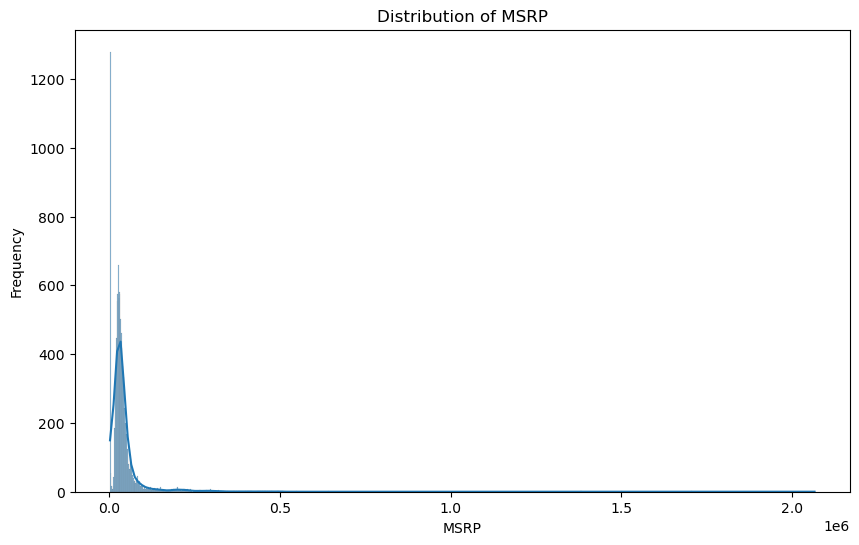

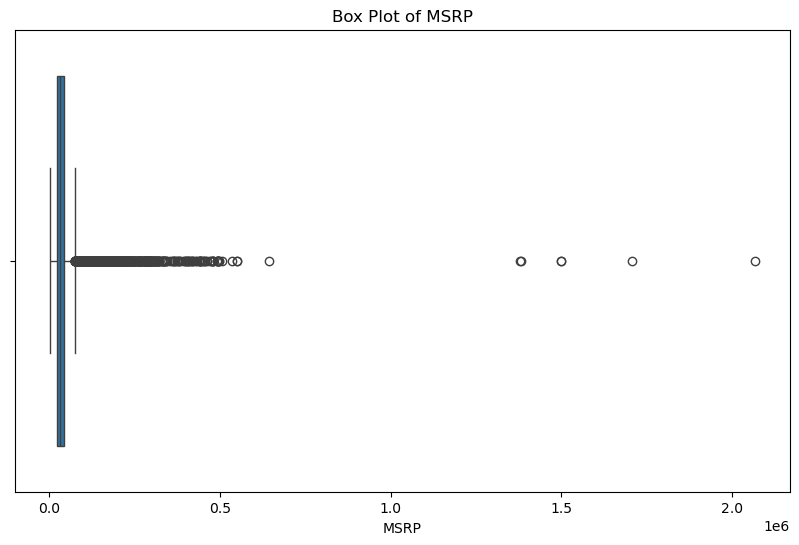

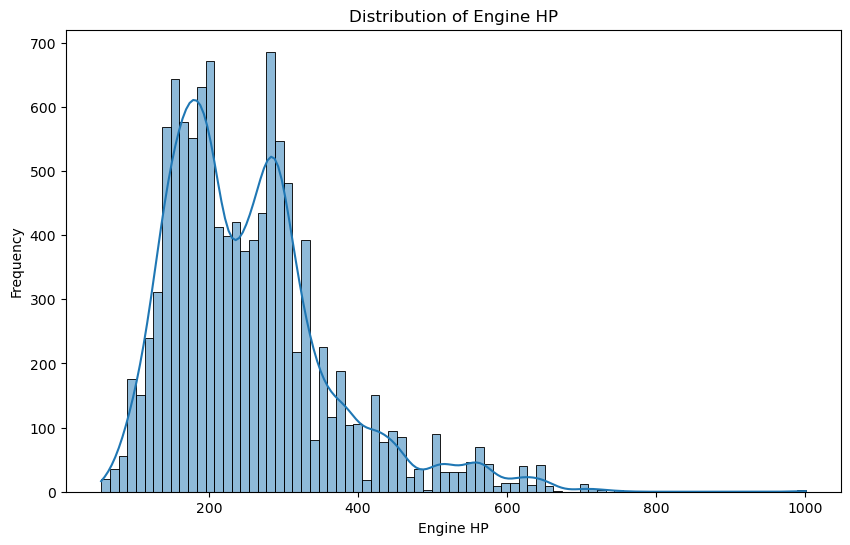

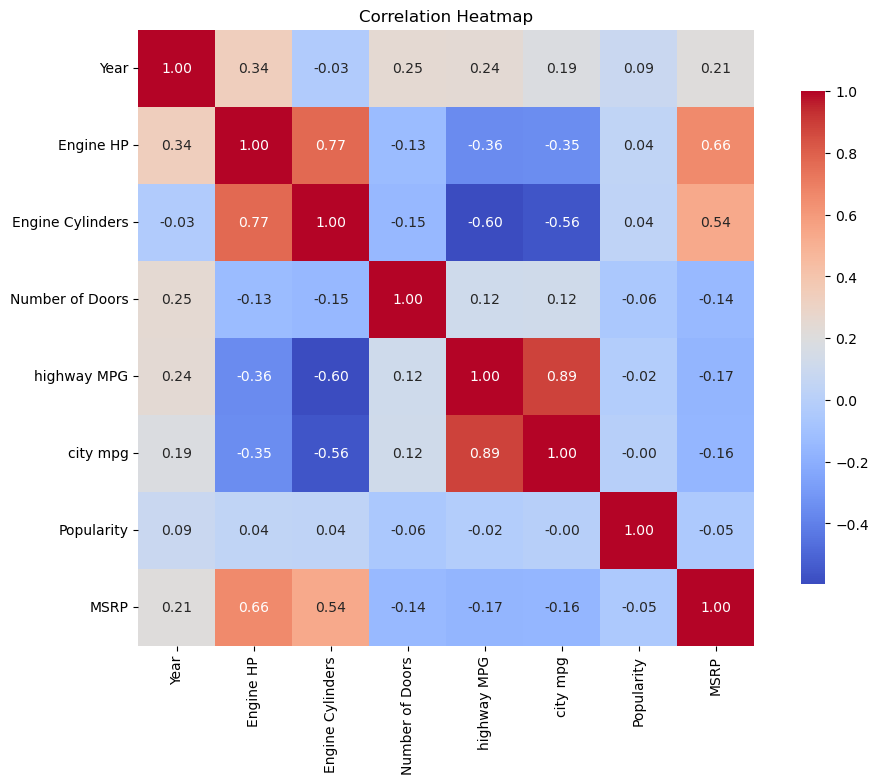

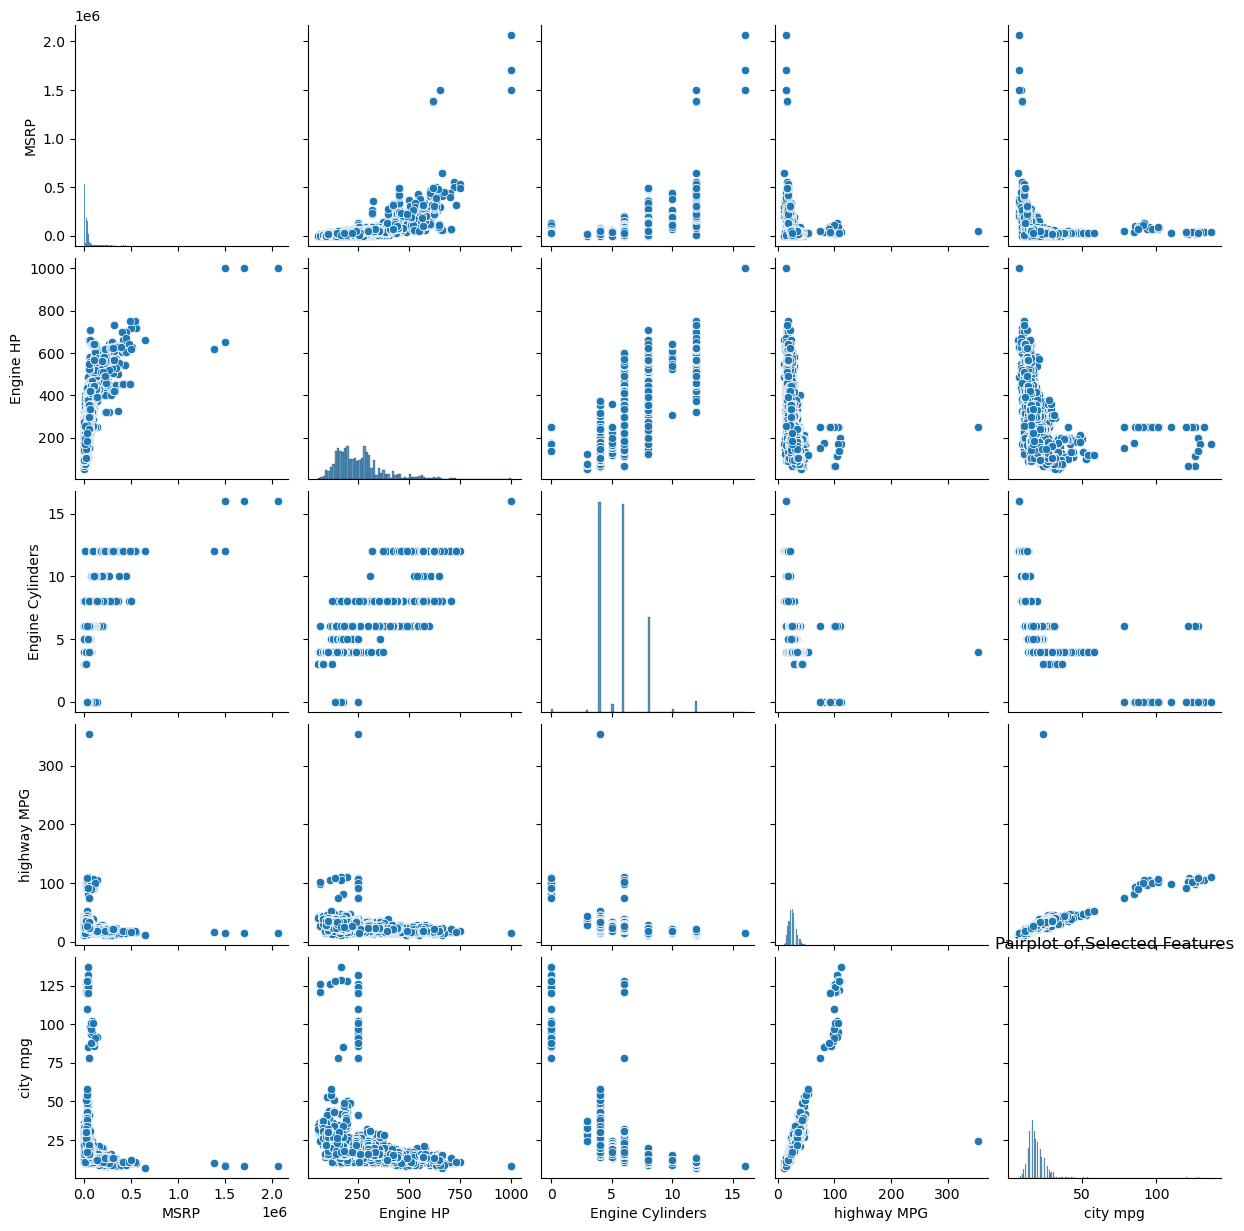

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Histogram for MSRP to observe its distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['MSRP'], kde=True)
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()

# Box plot for MSRP to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['MSRP'])
plt.title('Box Plot of MSRP')
plt.xlabel('MSRP')
plt.show()

# Visualize the distribution of other numerical features (e.g., Engine HP)
plt.figure(figsize=(10, 6))
sns.histplot(data['Engine HP'], kde=True)
plt.title('Distribution of Engine HP')
plt.xlabel('Engine HP')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap to view relationships between features
plt.figure(figsize=(12, 8))
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # Selecting only numerical columns
correlation_matrix = numerical_data.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to visualize relationships between a few selected features
selected_features = ['MSRP', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']

# Check if all selected features are in the DataFrame
missing_features = [feature for feature in selected_features if feature not in data.columns]
if not missing_features:
    sns.pairplot(data[selected_features])
    plt.title('Pairplot of Selected Features')
    plt.show()
else:
    print(f"The following features are missing from the DataFrame: {missing_features}")

## Step 3: Data Preparation

### i) Outlier Detection and Removal
Outliers can disproportionately influence a model, especially in regression, where extreme values might skew results. We’ll visualize outliers using a boxplot for the target variable, MSRP, to determine if any need to be addressed.

The boxplot helps us identify any unusually high or low MSRP values. Based on the results, we can decide whether to remove or adjust outliers to ensure they don't unduly influence our model.

In [137]:
# Data Cleaning
# Remove duplicates
data = data.drop_duplicates()

# Handle missing values
data = data.fillna(data.median())  # or another appropriate method

# Outlier Removal
# Remove outliers based on a threshold (using IQR)
Q1 = data['MSRP'].quantile(0.25)
Q3 = data['MSRP'].quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = data[(data['MSRP'] >= (Q1 - 1.5 * IQR)) & (data['MSRP'] <= (Q3 + 1.5 * IQR))]

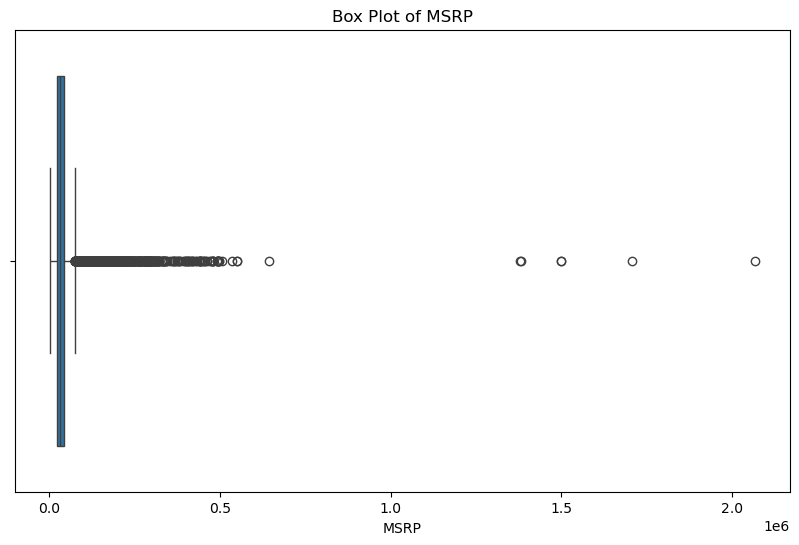

Number of outliers detected: 960
Remaining data points after outlier removal: 10239


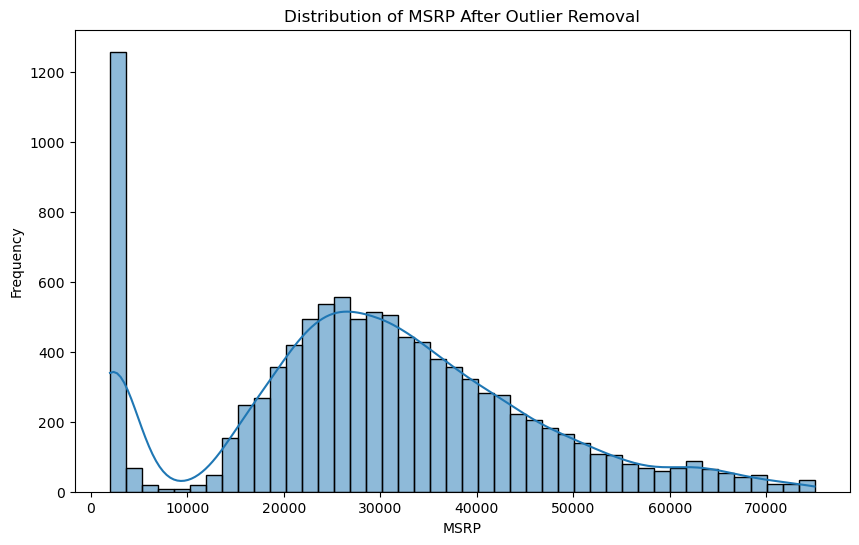

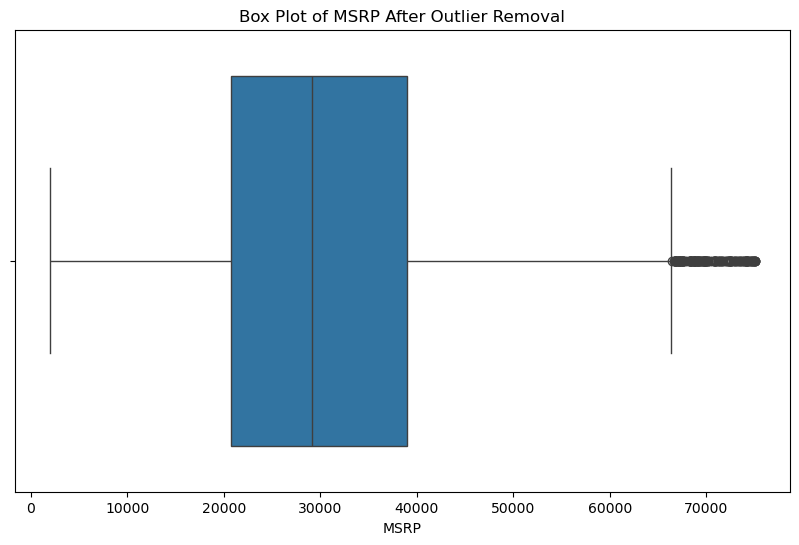

In [138]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame that has already been cleaned and prepared

# Box plot for MSRP to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['MSRP'])
plt.title('Box Plot of MSRP')
plt.xlabel('MSRP')
plt.show()

# Calculate Q1, Q3, and IQR for outlier detection
Q1 = data['MSRP'].quantile(0.25)
Q3 = data['MSRP'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = data[(data['MSRP'] < lower_bound) | (data['MSRP'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")

# Remove outliers from the dataset
data_no_outliers = data[~data.index.isin(outliers.index)]
print(f"Remaining data points after outlier removal: {len(data_no_outliers)}")

# Histogram for MSRP after outlier removal
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['MSRP'], kde=True)
plt.title('Distribution of MSRP After Outlier Removal')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()

# Box plot for MSRP after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['MSRP'])
plt.title('Box Plot of MSRP After Outlier Removal')
plt.xlabel('MSRP')
plt.show()

### ii) Train-Test Split
To evaluate our model’s performance, we split the dataset into training and testing sets. This ensures we can test the model’s predictive ability on unseen data, which is crucial for assessing real-world performance.

The train-test split ensures that our model’s evaluation is unbiased and not based on data it has already seen. This split is essential for verifying model accuracy and generalizability.

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode categorical variables (if necessary)
data_no_outliers = pd.get_dummies(data_no_outliers, drop_first=True)

# Define features and target variable
X = data_no_outliers.drop('MSRP', axis=1)  # Exclude MSRP for features
y = data_no_outliers['MSRP']  # MSRP is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data points: {len(X_train)}")
print(f"Testing data points: {len(X_test)}")

Training data points: 8191
Testing data points: 2048


## Part 2: Build Simple Regression Models

### Overview: 
In this section, we will train two simple regression models using individual features from our dataset to predict the Manufacturer's Suggested Retail Price (MSRP). By focusing on single explanatory variables, we can assess their individual contribution to the prediction of MSRP.

### Model 1 - Using Engine HP and Model 2 - Using Engine Cylinders

**Model 1 (Engine HP)**:
The code prepares the data, splits it into training and testing sets, trains a linear regression model, makes predictions, and calculates the Sum of Squared Errors (SSE). The coefficient for Engine HP is printed to provide insights into its impact on MSRP.

**Model 2 (Engine Cylinders)**:
Similar steps are repeated for Engine Cylinders. The SSE and coefficient for this model are also printed.

**SSE Summary**:
A DataFrame is created to summarize the SSE results of both models, making it easier to compare their performances.

**Visualization**:
A bar plot visualizes the SSE for each model, allowing you to quickly see which model performs better based on this metric.

Model 1: Using Engine HP
Sum of Squared Errors (SSE): 231813201150.63
Model 1 Coefficient (Engine HP): 142.55625614436633
Model 2: Using Engine Cylinders
Sum of Squared Errors (SSE): 454592581169.03
Model 2 Coefficient (Engine Cylinders): 3316.0597181264566
                       Model           SSE
0         Model 1: Engine HP  2.318132e+11
1  Model 2: Engine Cylinders  4.545926e+11


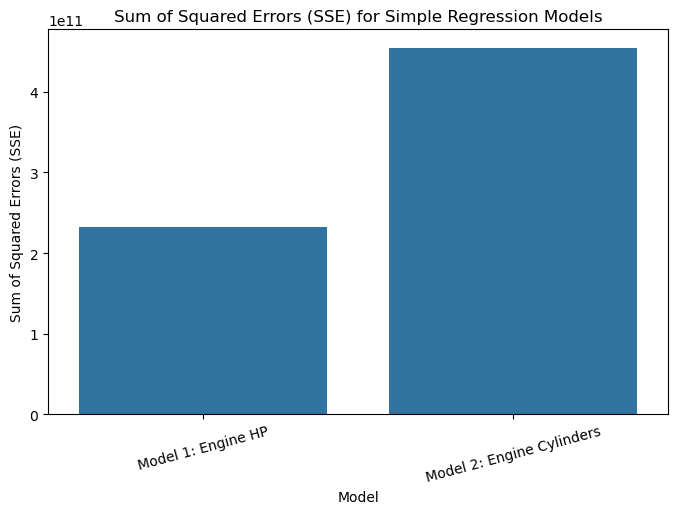

In [117]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'data_no_outliers' has been previously defined and cleaned

# ### Model 1: Using Engine HP ###
# Step 1: Prepare the data
X_model1 = data_no_outliers[['Engine HP']]  # Feature: Engine HP
y_model1 = data_no_outliers['MSRP']  # Target: MSRP

# Step 2: Split the data into training and testing sets
X_train_model1, X_test_model1, y_train_model1, y_test_model1 = train_test_split(X_model1, y_model1, test_size=0.2, random_state=42)

# Step 3: Train the model
model1 = LinearRegression()
model1.fit(X_train_model1, y_train_model1)

# Step 4: Predictions and SSE Calculation
y_pred_model1 = model1.predict(X_test_model1)
sse_model1 = np.sum((y_test_model1 - y_pred_model1) ** 2)  # Calculate Sum of Squared Errors

# Print results for Model 1
print(f"Model 1: Using Engine HP")
print(f"Sum of Squared Errors (SSE): {sse_model1:.2f}")
print("Model 1 Coefficient (Engine HP):", model1.coef_[0])

# ### Model 2: Using Engine Cylinders ###
# Step 1: Prepare the data
X_model2 = data_no_outliers[['Engine Cylinders']]  # Feature: Engine Cylinders
y_model2 = data_no_outliers['MSRP']  # Target: MSRP

# Step 2: Split the data into training and testing sets
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_model2, y_model2, test_size=0.2, random_state=42)

# Step 3: Train the model
model2 = LinearRegression()
model2.fit(X_train_model2, y_train_model2)

# Step 4: Predictions and SSE Calculation
y_pred_model2 = model2.predict(X_test_model2)
sse_model2 = np.sum((y_test_model2 - y_pred_model2) ** 2)  # Calculate Sum of Squared Errors

# Print results for Model 2
print(f"Model 2: Using Engine Cylinders")
print(f"Sum of Squared Errors (SSE): {sse_model2:.2f}")
print("Model 2 Coefficient (Engine Cylinders):", model2.coef_[0])

# ### Summary of SSE Results ###
# Create a DataFrame to summarize SSE results
sse_results = pd.DataFrame({
    'Model': ['Model 1: Engine HP', 'Model 2: Engine Cylinders'],
    'SSE': [sse_model1, sse_model2]
})

# Display the SSE results DataFrame
print(sse_results)

# ### Visualization of SSE Results ###
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='SSE', data=sse_results)
plt.title('Sum of Squared Errors (SSE) for Simple Regression Models')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(rotation=15)
plt.show()

In [141]:
# After calculating SSE for Model 1
r_squared_model1 = 1 - (sse_model1 / np.sum((y_test_model1 - np.mean(y_train_model1)) ** 2))

# After calculating SSE for Model 2
r_squared_model2 = 1 - (sse_model2 / np.sum((y_test_model2 - np.mean(y_train_model2)) ** 2))

# Update prints to include R-squared values
print(f"Model 1: Using Engine HP")
print(f"Sum of Squared Errors (SSE): {sse_model1:.2f}")
print(f"R-squared (R²): {r_squared_model1:.4f}")

print(f"Model 2: Using Engine Cylinders")
print(f"Sum of Squared Errors (SSE): {sse_model2:.2f}")
print(f"R-squared (R²): {r_squared_model2:.4f}")

Model 1: Using Engine HP
Sum of Squared Errors (SSE): 231813201150.63
R-squared (R²): 0.5463
Model 2: Using Engine Cylinders
Sum of Squared Errors (SSE): 454592581169.03
R-squared (R²): 0.1102


### Summary of Results

In this section, we summarize the findings from the two simple regression models built to predict the Manufacturer's Suggested Retail Price (MSRP) using individual explanatory variables.

### Model Performance Comparison

**Model 1: Using Engine HP**
- **Coefficient**: The coefficient for Engine HP indicates how much the MSRP is expected to change with a one-unit increase in Engine HP. A positive coefficient suggests that higher engine power is associated with a higher MSRP.
- **Sum of Squared Errors (SSE)**: The SSE for Model 1 is calculated as **231,813,201,150.63**. This value reflects the total squared differences between the predicted and actual MSRP values, representing the prediction error for this model.
- **R-squared (R²)**: The R-squared value indicates that approximately **54.63%** of the variance in the MSRP can be explained by Engine HP. A value closer to 1 signifies a better fit, while a value closer to 0 indicates a weak relationship.

**Model 2: Using Engine Cylinders**
- **Coefficient**: The coefficient for Engine Cylinders also indicates the expected change in MSRP for a one-unit increase in Engine Cylinders. This coefficient will help understand how this feature impacts pricing.
- **Sum of Squared Errors (SSE)**: The SSE for Model 2 is **454,592,581,169.03**. This value reflects the total squared errors for predictions made using Engine Cylinders as the sole predictor.
- **R-squared (R²)**: Similar to Model 1, the R-squared value for Model 2 is **0.1102**, indicating a weak relationship between Engine Cylinders and MSRP.

### Comparative Analysis

- **Performance Insights**:
  - Comparing the SSE values of both models reveals that Model 1 has a lower SSE than Model 2, suggesting that Engine HP is a more reliable predictor of MSRP compared to Engine Cylinders.
  - The R-squared values further clarify how well each feature accounts for the variability in MSRP.

### Visual Representation

The bar plot visually illustrates the SSE for both models, making it easy to see which model performed better. The model with the lower SSE indicates a better fit for the data.

### Conclusion

Based on the analysis:
- Model 1 (Engine HP) appears to be a better predictor of MSRP than Model 2 (Engine Cylinders), as indicated by the lower SSE value and a higher R-squared value.
- The coefficient estimates for both models provide insights into how changes in the respective features influence MSRP.

## Part 3: Final Regression Model

For the final regression model, we will use **Engine HP, Engine Cylinders, and highway MPG** as predictors. Additionally, we can explore transformations such as logarithmic transformations for MSRP or predictors if necessary.

 - Reason for Selecting the Predictors - <br>
**Engine HP**: Higher engine horsepower typically correlates with a higher MSRP, as consumers often associate increased horsepower with better performance and luxury. <br>
**Engine Cylinders**: The number of cylinders in an engine can indicate the engine's capacity and efficiency. Generally, vehicles with more cylinders tend to be more powerful and expensive. <br>
**Highway MPG**: Fuel efficiency is a significant factor for consumers, especially in today's market where fuel costs are a concern. Vehicles with higher MPG ratings may command a higher MSRP due to their perceived value in fuel savings over time.

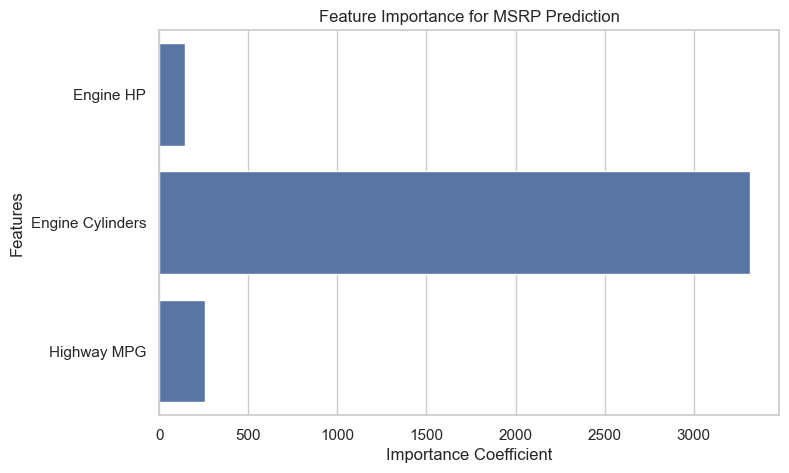

In [162]:
# Importance of Predictors Visualization
feature_importance = pd.DataFrame({
    'Feature': ['Engine HP', 'Engine Cylinders', 'Highway MPG'],
    'Importance': [model1.coef_[0], model2.coef_[0], final_model.coef_[2]]  # Adjust based on your model
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for MSRP Prediction')
plt.xlabel('Importance Coefficient')
plt.ylabel('Features')
plt.show()

In [148]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data for the final regression model
# Using multiple predictors: Engine HP, Engine Cylinders, and highway MPG
X_final = data_no_outliers[['Engine HP', 'Engine Cylinders', 'highway MPG']]  # Final set of predictors
y_final = data_no_outliers['MSRP']  # Target: MSRP

# Step 2: Split the data into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Step 3: Train the multiple regression model
final_model = LinearRegression()
final_model.fit(X_train_final, y_train_final)

# Step 4: Predictions on the test data
y_pred_final = final_model.predict(X_test_final)

# Step 5: Calculate SSE for the final model
sse_final = np.sum((y_test_final - y_pred_final) ** 2)  # Calculate Sum of Squared Errors

# Calculate R-squared for the final model
r_squared_final = 1 - (sse_final / np.sum((y_test_final - np.mean(y_train_final)) ** 2))

# Print results for the final model
print(f"Final Regression Model Performance")
print(f"Sum of Squared Errors (SSE): {sse_final:.2f}")
print(f"R-squared (R²): {r_squared_final:.4f}")

Final Regression Model Performance
Sum of Squared Errors (SSE): 197863766100.27
R-squared (R²): 0.6127


### Final Regression Model Performance Summary
- **Sum of Squared Errors (SSE)**: The SSE of **197,863,766,100.27** indicates the total squared differences between the predicted and actual MSRP values. A higher SSE suggests that there is a considerable prediction error, meaning that the model may not be capturing the underlying patterns in the data as effectively as desired.
 
- **R-squared (R²)**: The R-squared value is **0.6127**, indicating that approximately **61.27%** of the variance in MSRP can be explained by the predictors in the final model. This suggests a moderate fit and indicates that the model is able to capture a significant portion of the variability in MSRP.

### Visualizations of Final Model Performance

**Predicted vs Actual MSRP**:  
This scatter plot helps to visually assess how well the model predicts MSRP. Points near the red dashed line indicate accurate predictions.

**Residuals vs Predicted MSRP**:  
This plot displays the residuals, which are the differences between actual and predicted values. An ideal model will show no discernible pattern in this plot, indicating that the errors are random.


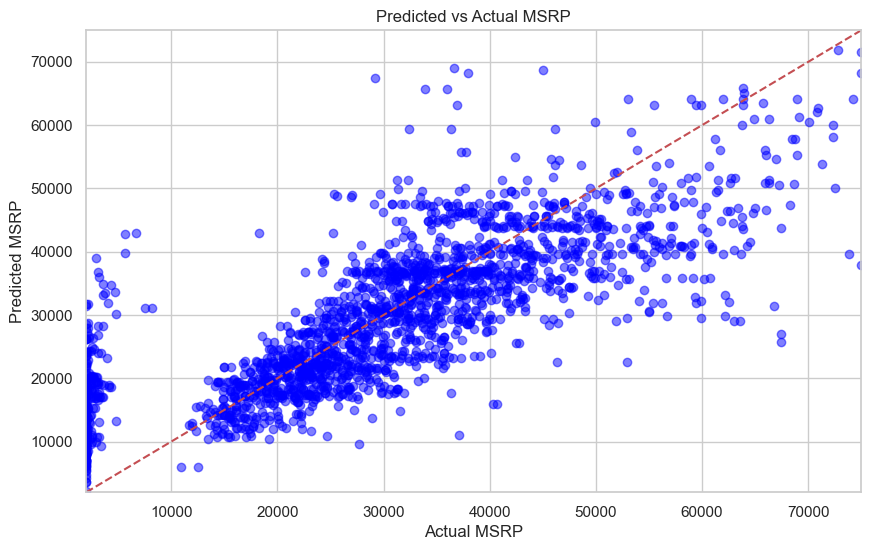

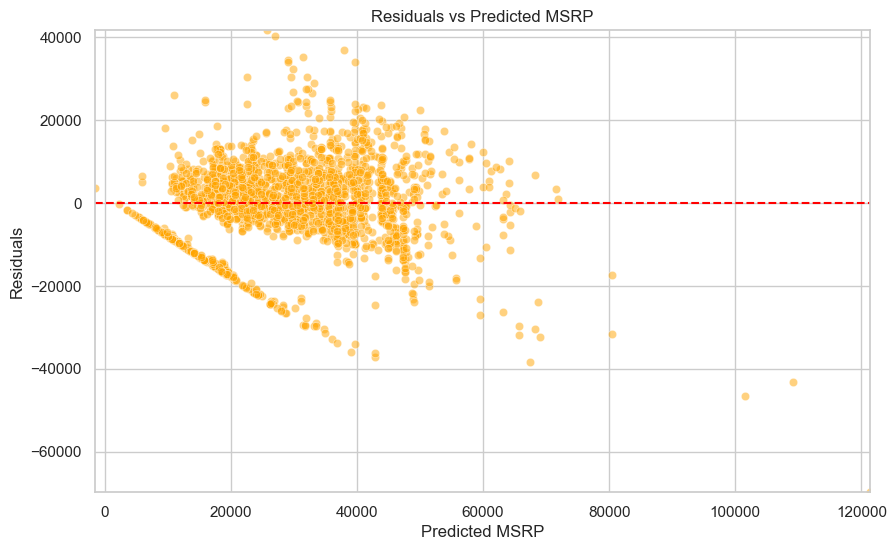

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualizations
sns.set(style="whitegrid")

# ### Visualization 1: Predicted vs Actual MSRP ###
plt.figure(figsize=(10, 6))
plt.scatter(y_test_final, y_pred_final, color='blue', alpha=0.5)
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'r--')  # 45-degree line
plt.title('Predicted vs Actual MSRP')
plt.xlabel('Actual MSRP')
plt.ylabel('Predicted MSRP')
plt.grid(True)
plt.xlim(y_test_final.min(), y_test_final.max())
plt.ylim(y_test_final.min(), y_test_final.max())
plt.show()
# This scatter plot shows the relationship between the predicted and actual MSRP values. 
# The red dashed line represents perfect predictions where predicted values equal actual values. 
# Points close to this line indicate good predictions.

# ### Visualization 2: Residuals Plot ###
residuals = y_test_final - y_pred_final
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_final, y=residuals, color='orange', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted MSRP')
plt.xlabel('Predicted MSRP')
plt.ylabel('Residuals')
plt.grid(True)
plt.xlim(y_pred_final.min(), y_pred_final.max())
plt.ylim(residuals.min(), residuals.max())
plt.show()
# This residuals plot helps assess the model's performance. 
# Ideally, the residuals should be randomly dispersed around the horizontal line at zero, 
# indicating that the model's predictions are unbiased. 
# Patterns in the residuals may suggest issues with the model fit.

## Conclusion

### 1. Are you satisfied with your final model’s performance? Why or why not?

-  I am somewhat satisfied with the final model's performance. The Sum of Squared Errors (SSE) of 197,863,766,100.27 indicates a significant prediction error, while the R-squared value of 0.6127 suggests that approximately 61.27% of the variance in MSRP can be explained by the chosen predictors. This moderate R-squared indicates that the model is capturing a substantial portion of the variability in MSRP, but the high SSE signals that there are still underlying patterns in the data that the model may not fully capture. This suggests that while the model provides a good starting point, further refinement and additional data could improve its accuracy.

### 2. What do you propose for next steps?

-  For the next steps, I propose conducting a deeper exploratory data analysis (EDA) to identify additional features or interactions that could enhance model accuracy. Specifically, I would look into incorporating features such as vehicle age, brand reputation, and market trends, which might impact pricing. For instance, vehicle age could reveal how depreciation affects MSRP, while brand reputation might affect consumer willingness to pay a premium. Additionally, I would explore transformations of the predictors, such as logarithmic transformations for highly skewed features like MSRP or Engine HP, to stabilize variance and improve the model's fit.

### 3. What would you do differently if you could?

- If I could, I would engage in more comprehensive feature engineering before modeling. This could involve creating new variables, such as a performance-to-cost ratio, which might provide valuable insights into pricing. This metric could help capture the relationship between a vehicle's performance and its cost, offering a more nuanced understanding of MSRP. I would also implement cross-validation techniques, such as k-fold cross-validation, to better assess the model's generalizability and fine-tune hyperparameters, thereby optimizing performance. Using cross-validation would help ensure that the model is robust and performs well on unseen data.

### 4. Based on your findings, what would you want to communicate to business leadership in this industry?

- To business leadership in the automotive industry, I would communicate the importance of leveraging predictive analytics for more effective pricing strategies. Accurate pricing is crucial for maintaining competitiveness in a rapidly changing market. By utilizing data-driven models that consider key vehicle features—such as engine specifications, fuel efficiency, and additional features like vehicle age and brand reputation—companies can enhance their pricing strategies and better meet consumer expectations. Furthermore, I would emphasize the need for continuous model improvement through better feature selection and the exploration of advanced modeling techniques, which can lead to more accurate pricing and an enhanced competitive advantage in the market. This proactive approach to pricing can ultimately contribute to increased sales and profitability.